In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# orig_url = "https://drive.google.com/file/d/12fFZ9k8wsmWBVUhcsVxmKsqHxaVzAzqt/view?usp=sharing"
# file_id = orig_url.split('/')[-2]
# data_path='https://drive.google.com/uc?export=download&id=' + file_id

data_path='https://drive.google.com/uc?export=download&id=1A3MUldrs0z09DlYR6Y1utfySwKNO9Qsz'
df = pd.read_csv(data_path)
df.head(10)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [2]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")
df["TotalCharges"]= df["TotalCharges"].apply(lambda x: "0" if x == " " else x )
df["TotalCharges"] = df["TotalCharges"].astype("float64")
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [3]:
X = df.drop(columns = ['Unnamed: 0','Churn', "customerID"])
y = df['Churn']
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4190, 19), (1796, 19), (4190,), (1796,))

In [96]:
X.describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2294.221559
std,24.516391,30.114702,2274.164124
min,0.000000,18.250000,0.000000
25%,9.000000,35.650000,401.587500
50%,29.000000,70.400000,1408.575000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


In [103]:
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
# categorical_features.append("tenure")
# numeric_features.remove("tenure")
categorical_features, numeric_features

(['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

In [104]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available').set_output(transform="pandas")),
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore", drop = "if_binary" ).set_output(transform="pandas"))
                                          ])
categorical_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='Not Available',
                               strategy='constant')),
                ('onehot',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

In [105]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5).set_output(transform="pandas")),
                                      ("scaler", MinMaxScaler().set_output(transform="pandas"))
                                      ])
numeric_transformer

Pipeline(steps=[('knn_imputer', KNNImputer()), ('scaler', MinMaxScaler())])

In [106]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer,
                                                       numeric_features),
                                               ("cat", categorical_transformer,
                                                       categorical_features)
                                               ]).set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=42, max_depth = 5, n_estimators = 50, min_samples_split = 10, subsample = 1, loss = "deviance", max_features = None,min_samples_leaf = 1  )
pipeline_gbm = Pipeline([("pre_process", preprocessor),
                         ("model", gbm)])
pipeline_gbm

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='igno...
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 GradientBoostingClassifier(loss='deviance', max_depth=5,
                                            min_samples_split=10,
                                            n_estimators=50, random_state=42,
                                            subsample=1))])

In [108]:
np.mean(cross_val_score(pipeline_gbm, X_train, y_train, cv=3, scoring='roc_auc'))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


0.8372433960385809

In [14]:
y_train

3499     No
579      No
3722    Yes
247      No
5154    Yes
       ... 
3339    Yes
4496     No
3202    Yes
782      No
5829     No
Name: Churn, Length: 4190, dtype: object

In [109]:
pipeline_gbm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='igno...
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 GradientBoostingClassifier(loss='deviance', max_depth=5,
                                            min_samples_split=10,
                                            n_estimators=50, random_state=42,
                                            subsample=1))])

In [110]:
y_pred = pipeline_gbm.predict(X_test)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1320
         Yes       0.65      0.51      0.57       476

    accuracy                           0.80      1796
   macro avg       0.75      0.71      0.72      1796
weighted avg       0.79      0.80      0.79      1796



In [112]:
print(confusion_matrix(y_test, y_pred))

[[1193  127]
 [ 235  241]]


In [113]:
pipeline_gbm["pre_process"].get_feature_names_out()

array(['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges',
       'cat__gender_Male', 'cat__SeniorCitizen_1', 'cat__Partner_Yes',
       'cat__Dependents_Yes', 'cat__PhoneService_Yes',
       'cat__MultipleLines_No', 'cat__MultipleLines_No phone service',
       'cat__MultipleLines_Yes', 'cat__InternetService_DSL',
       'cat__InternetService_Fiber optic', 'cat__InternetService_No',
       'cat__OnlineSecurity_No',
       'cat__OnlineSecurity_No internet service',
       'cat__OnlineSecurity_Yes', 'cat__OnlineBackup_No',
       'cat__OnlineBackup_No internet service', 'cat__OnlineBackup_Yes',
       'cat__DeviceProtection_No',
       'cat__DeviceProtection_No internet service',
       'cat__DeviceProtection_Yes', 'cat__TechSupport_No',
       'cat__TechSupport_No internet service', 'cat__TechSupport_Yes',
       'cat__StreamingTV_No', 'cat__StreamingTV_No internet service',
       'cat__StreamingTV_Yes', 'cat__StreamingMovies_No',
       'cat__StreamingMovies_No internet servic

In [119]:
pipeline_gbm['model'].feature_importances_

array([0.13233628, 0.12773633, 0.14450443, 0.00378995, 0.01216681,
       0.00496854, 0.00360461, 0.00283352, 0.00627387, 0.00196967,
       0.00527369, 0.00564797, 0.03013645, 0.        , 0.06624614,
       0.        , 0.00117309, 0.0145876 , 0.        , 0.00190147,
       0.000425  , 0.00053568, 0.00193468, 0.01506499, 0.        ,
       0.0007934 , 0.00086318, 0.        , 0.00060495, 0.00173341,
       0.        , 0.00397842, 0.34886859, 0.00264867, 0.00313533,
       0.02052575, 0.00277557, 0.00261409, 0.02650279, 0.00184509])

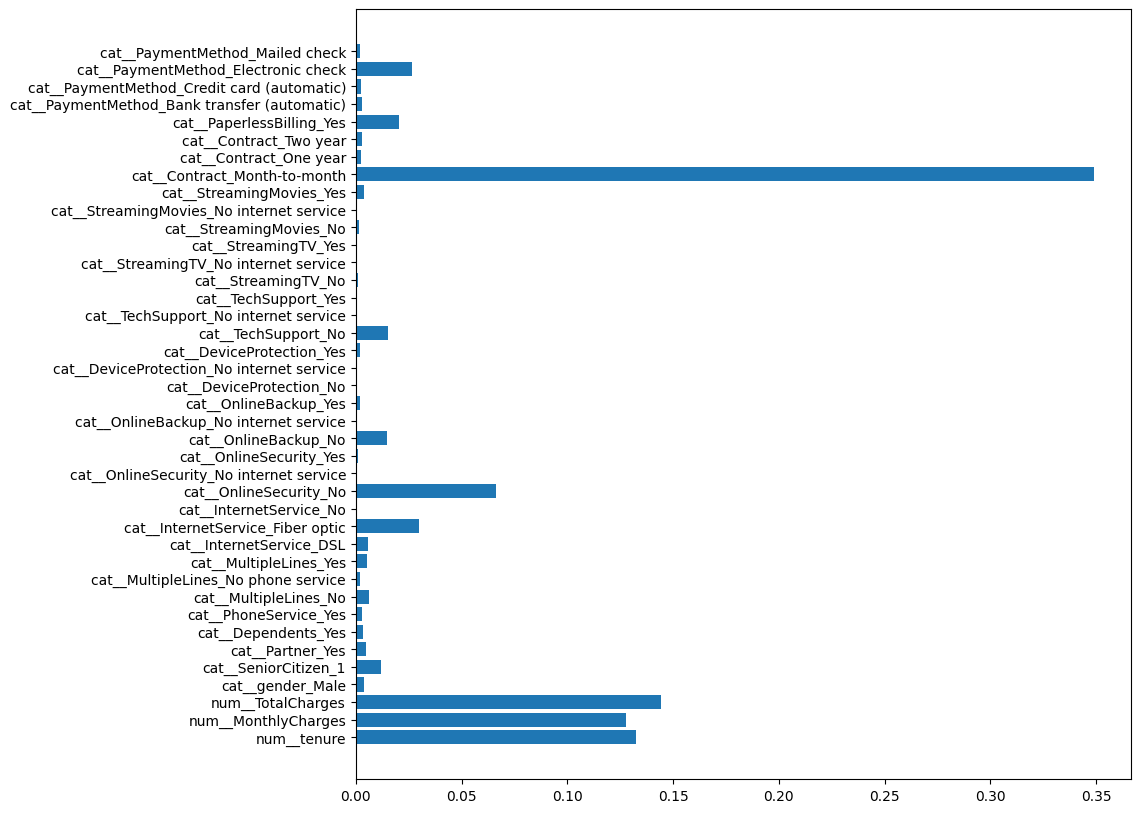

In [129]:
plt.figure(figsize = (10,10))
plt.barh(pipeline_gbm["pre_process"].get_feature_names_out(), pipeline_gbm['model'].feature_importances_, )

plt.show()

In [114]:
transformed_data = pipeline_gbm.named_steps['pre_process'].transform(X_train)

# Display the resulting DataFrame
transformed_data

,num__tenure,num__MonthlyCharges,num__TotalCharges,cat__gender_Male,cat__SeniorCitizen_1,cat__Partner_Yes,cat__Dependents_Yes,cat__PhoneService_Yes,cat__MultipleLines_No,cat__MultipleLines_No phone service,...,cat__StreamingMovies_No internet service,cat__StreamingMovies_Yes,cat__Contract_Month-to-month,cat__Contract_One year,cat__Contract_Two year,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check
3499,0.375000,0.018435,0.065688,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
579,0.875000,0.859492,0.769526,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3722,0.986111,0.900349,0.897971,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
247,0.166667,0.148480,0.051928,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5154,0.194444,0.676134,0.144260,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,0.013889,0.509716,0.008103,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4496,0.138889,0.014948,0.024315,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3202,0.208333,0.017439,0.033632,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
782,0.875000,0.615346,0.588482,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [130]:
df["num_services"] = (
    df["PhoneService"].apply(lambda x: 1 if x == "Yes" else 0 )+
    df["MultipleLines"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["InternetService"].apply(lambda x: 0 if x == "No" else 1 ) +
    df["OnlineSecurity"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["OnlineBackup"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["DeviceProtection"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["TechSupport"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["StreamingTV"].apply(lambda x: 1 if x == "Yes" else 0 ) +
    df["StreamingMovies"].apply(lambda x: 1 if x == "Yes" else 0 )
)
df["num_services"]

0       2
1       5
2       3
3       3
4       4
       ..
5981    5
5982    9
5983    1
5984    6
5985    1
Name: num_services, Length: 5986, dtype: int64

In [131]:
df["num_services"].value_counts()

1    1066
4     800
5     777
6     766
2     741
3     728
7     583
8     342
9     183
Name: num_services, dtype: int64

In [159]:
df["auto_payment"] = df["PaymentMethod"].apply(lambda x: 1 if "automatic" in x  else 0 )
df["auto_payment"] = df["auto_payment"].astype("object")

In [160]:
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,num_services,auto_payment
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,2,1
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,5,1
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,3,1
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,3,0
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes,5,0
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No,9,1
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No,1,0
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes,6,0


In [161]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
num_services          int64
auto_payment         object
dtype: object

In [219]:
X = df.drop(columns = ['Unnamed: 0', "customerID", 'Churn', "gender"]) #"PhoneService","MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup" , "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaymentMethod"
y = df['Churn']
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4190, 20), (1796, 20), (4190,), (1796,))

In [188]:
X.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
num_services          int64
auto_payment         object
dtype: object

In [220]:
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
# categorical_features.append("tenure")
# numeric_features.remove("tenure")
categorical_features, numeric_features

(['SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'auto_payment'],
 ['tenure', 'MonthlyCharges', 'TotalCharges', 'num_services'])

In [221]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available').set_output(transform="pandas")),
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore", drop = "if_binary" ).set_output(transform="pandas"))
                                          ])
categorical_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='Not Available',
                               strategy='constant')),
                ('onehot',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

In [222]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5).set_output(transform="pandas")),
                                      ("scaler", MinMaxScaler().set_output(transform="pandas"))
                                      ])
numeric_transformer

Pipeline(steps=[('knn_imputer', KNNImputer()), ('scaler', MinMaxScaler())])

In [223]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer,
                                                       numeric_features),
                                               ("cat", categorical_transformer,
                                                       categorical_features)
                                               ]).set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges',
                                  'num_services']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod',
                                  'auto_payment'])])

In [229]:
gbm = GradientBoostingClassifier(random_state=42, max_depth = 5, n_estimators = 100, min_samples_split = 10, subsample = 1, loss = "deviance", max_features = None, min_samples_leaf = 1 , class_weights = "balanced" )
pipeline_gbm = Pipeline([("pre_process", preprocessor),
                         ("model", gbm)])
pipeline_gbm

TypeError: ignored

In [225]:
np.mean(cross_val_score(pipeline_gbm, X_train, y_train, cv=3, scoring='roc_auc'))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


0.8269061987513838

In [226]:
pipeline_gbm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'num_services']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handl...
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'auto_payment'])])),
                ('model',
                 GradientBoostingClassifier(loss='deviance', max_depth=5,
                                            min_samples_split=10,
                                            random_state=42, subsample=1))])

In [227]:
y_pred = pipeline_gbm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1320
         Yes       0.63      0.51      0.56       476

    accuracy                           0.79      1796
   macro avg       0.73      0.70      0.71      1796
weighted avg       0.78      0.79      0.78      1796

[[1175  145]
 [ 234  242]]


In [217]:
pipeline_gbm["pre_process"].get_feature_names_out()

array(['num__tenure', 'num__MonthlyCharges', 'num__num_services',
       'cat__gender_Male', 'cat__SeniorCitizen_1', 'cat__Partner_Yes',
       'cat__Dependents_Yes', 'cat__PhoneService_Yes',
       'cat__MultipleLines_No', 'cat__MultipleLines_No phone service',
       'cat__MultipleLines_Yes', 'cat__InternetService_DSL',
       'cat__InternetService_Fiber optic', 'cat__InternetService_No',
       'cat__OnlineSecurity_No',
       'cat__OnlineSecurity_No internet service',
       'cat__OnlineSecurity_Yes', 'cat__OnlineBackup_No',
       'cat__OnlineBackup_No internet service', 'cat__OnlineBackup_Yes',
       'cat__DeviceProtection_No',
       'cat__DeviceProtection_No internet service',
       'cat__DeviceProtection_Yes', 'cat__TechSupport_No',
       'cat__TechSupport_No internet service', 'cat__TechSupport_Yes',
       'cat__StreamingTV_No', 'cat__StreamingTV_No internet service',
       'cat__StreamingTV_Yes', 'cat__StreamingMovies_No',
       'cat__StreamingMovies_No internet servic

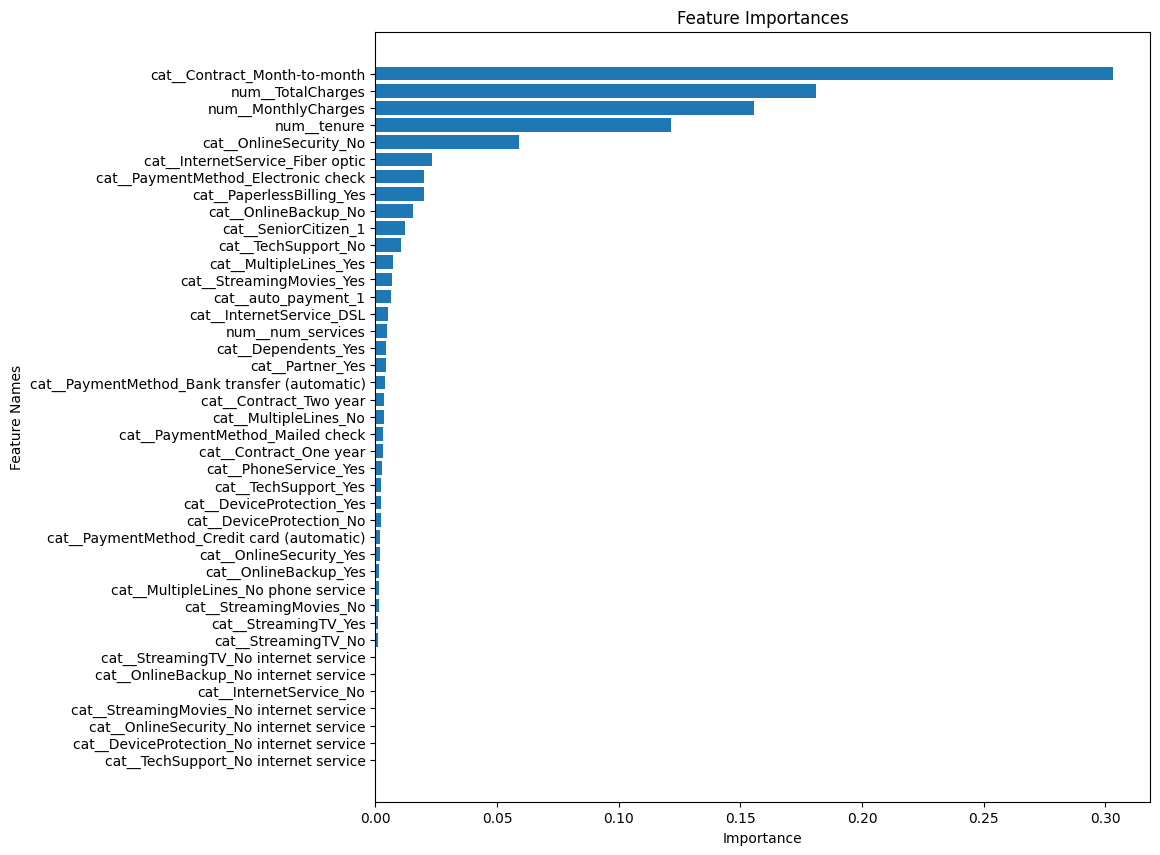

In [228]:

# Extract feature names and importances
feature_names = pipeline_gbm["pre_process"].get_feature_names_out()
importances = pipeline_gbm['model'].feature_importances_

# Sort indices by importance values
sorted_indices = np.argsort(importances)

# Sort feature names and importances accordingly
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_importances = importances[sorted_indices]

# Create the horizontal bar chart
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names, sorted_importances)

plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importances')

plt.show()